In [1]:
import pandas as pd

In [2]:
import pickle

In [3]:
p_df = pd.read_pickle(r"C:\Users\srish\Documents\NEU\Parallell ML and AI\Untitled Folder\data\example_pickle.tar\example_pickle\example_pickle")

In [4]:
p_df

,is_miner,address,output_month_min,output_month_max,input_month_min,input_month_max,output_active_time,input_active_time,io_max_lag,io_min_lag,...,total_tx_input_value,mean_tx_input_value,stddev_tx_input_value,total_input_tx,mean_monthly_input_value,mean_monthly_input_count,mean_output_idle_time,stddev_output_idle_time,mean_input_idle_time,stddev_input_idle_time
0,False,17KCKe2Y1G4Yq8n8rxpGfCfAFaeHfe6HbQ,1535760000,1564617600,1541030400,1585699200,28857600,44668800,-21081600,-5270400,...,104885531.000000000,2913486.972222222,1.818265e+06,4,2913486.972222222,1.0,7.899492e+05,6.208239e+05,1.483250e+07,8.952467e+06
1,False,1BBWdYQC8dqbcmX18xFcFtnAibnoQSQHfH,1388534400,1398902400,1391212800,1401580800,10368000,10368000,-2678400,-2678400,...,417604833.000000000,2676954.057692308,2.575962e+06,31,2676954.057692308,1.0,6.073680e+04,2.096533e+05,4.059397e+05,4.389097e+05
2,False,1AzTnHzcG9PTjsnDczrqJWYTkpg6vxSgRs,1504224000,1514764800,1504224000,1514764800,10540800,10540800,0,0,...,507601165.000000000,25380058.250000000,3.775487e+07,19,25380058.250000000,1.0,7.097466e+05,1.567057e+06,7.499310e+05,1.726071e+06
3,False,12bLfmAprxGBVxWJ3ygQByFs31A9joa1hp,1456790400,1496275200,1456790400,1496275200,39484800,39484800,0,0,...,330123219.000000000,5502053.650000000,3.977741e+06,60,5502053.650000000,1.0,6.957878e+05,9.700859e+05,6.804973e+05,9.228746e+05
4,False,1KxBDWvTLncwNLMFUyVCU2QwaUrY2FToE,1472688000,1506816000,1472688000,1506816000,34128000,34128000,0,0,...,1378204470.000000000,5815208.734177215,1.119639e+07,104,5815208.734177215,1.0,1.399946e+05,4.138563e+05,3.209693e+05,5.447932e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5010027,False,15CFGNLRjzh17PD5c8NvwbKunqFtV4eTHp,1496275200,1519862400,1496275200,1519862400,23587200,23587200,0,0,...,5650618.000000000,297400.947368421,1.326813e+05,15,297400.947368421,1.0,1.448501e+06,2.938029e+06,2.073995e+06,3.116732e+06
5010028,False,1LrbJDHLBfqkV2rvZYtuYQVY6S7CyxSnPy,1567296000,1577836800,1572566400,1590969600,10540800,18403200,-13132800,-5270400,...,473344.000000000,24912.842105263,5.961492e+03,2,24912.842105263,1.0,6.052822e+05,6.163459e+04,1.879229e+07,NaN
5010029,False,3PXf42gfCZAL1nYZDQcPLJ5A3Af83YXYkQ,1590969600,1590969600,1590969600,1590969600,0,0,0,0,...,14200000.000000000,747368.421052632,3.045186e+05,19,747368.421052632,1.0,6.617000e+04,6.116551e+04,7.173517e+04,7.920090e+04
5010030,False,39fnDUHBJ9CsG9yZH64UCGsmk5FnWw4cHr,1559347200,1564617600,1559347200,1564617600,5270400,5270400,0,0,...,18192777.000000000,957514.578947368,7.207387e+05,19,957514.578947368,1.0,3.522885e+05,2.544391e+05,3.520739e+05,2.566096e+05


In [5]:
p_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5010032 entries, 0 to 5010031
Data columns (total 30 columns):
is_miner                     bool
address                      object
output_month_min             int64
output_month_max             int64
input_month_min              int64
input_month_max              int64
output_active_time           int64
input_active_time            int64
io_max_lag                   int64
io_min_lag                   int64
output_active_months         int64
total_tx_output_count        int64
total_tx_output_value        object
mean_tx_output_value         object
stddev_tx_output_value       float64
total_output_tx              int64
mean_monthly_output_value    object
mean_monthly_output_count    float64
input_active_months          int64
total_tx_input_count         int64
total_tx_input_value         object
mean_tx_input_value          object
stddev_tx_input_value        float64
total_input_tx               int64
mean_monthly_input_value     object


In [6]:
from google.cloud import bigquery
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patheffects as PathEffects
import matplotlib.pylab as pylab
import numpy as np
import pandas as pd
import itertools
from sklearn.metrics import  confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import time
import seaborn as sns
from keras import utils, optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.losses import binary_crossentropy

Using TensorFlow backend.


In [7]:
p_df.drop(labels = ['stddev_output_idle_time','stddev_input_idle_time'], axis = 1, inplace = True)

In [8]:
p_df.tail(5)

,is_miner,address,output_month_min,output_month_max,input_month_min,input_month_max,output_active_time,input_active_time,io_max_lag,io_min_lag,...,input_active_months,total_tx_input_count,total_tx_input_value,mean_tx_input_value,stddev_tx_input_value,total_input_tx,mean_monthly_input_value,mean_monthly_input_count,mean_output_idle_time,mean_input_idle_time
5010027,False,15CFGNLRjzh17PD5c8NvwbKunqFtV4eTHp,1496275200,1519862400,1496275200,1519862400,23587200,23587200,0,0,...,6,19,5650618.000000000,297400.947368421,132681.260484,15,297400.947368421,1.0,1.448501e+06,2.073995e+06
5010028,False,1LrbJDHLBfqkV2rvZYtuYQVY6S7CyxSnPy,1567296000,1577836800,1572566400,1590969600,10540800,18403200,-13132800,-5270400,...,2,19,473344.000000000,24912.842105263,5961.492051,2,24912.842105263,1.0,6.052822e+05,1.879229e+07
5010029,False,3PXf42gfCZAL1nYZDQcPLJ5A3Af83YXYkQ,1590969600,1590969600,1590969600,1590969600,0,0,0,0,...,1,19,14200000.000000000,747368.421052632,304518.601973,19,747368.421052632,1.0,6.617000e+04,7.173517e+04
5010030,False,39fnDUHBJ9CsG9yZH64UCGsmk5FnWw4cHr,1559347200,1564617600,1559347200,1564617600,5270400,5270400,0,0,...,3,19,18192777.000000000,957514.578947368,720738.669685,19,957514.578947368,1.0,3.522885e+05,3.520739e+05
5010031,False,1CfcXjeEynTeRXdpLRzLvkU2nb7c3tmZQ1,1572566400,1583020800,1575158400,1583020800,10454400,7862400,0,-2592000,...,4,19,10374.000000000,546.000000000,0.000000,10,546.000000000,1.0,5.927042e+05,8.557566e+05


In [9]:
p_df.head(5)

,is_miner,address,output_month_min,output_month_max,input_month_min,input_month_max,output_active_time,input_active_time,io_max_lag,io_min_lag,...,input_active_months,total_tx_input_count,total_tx_input_value,mean_tx_input_value,stddev_tx_input_value,total_input_tx,mean_monthly_input_value,mean_monthly_input_count,mean_output_idle_time,mean_input_idle_time
0,False,17KCKe2Y1G4Yq8n8rxpGfCfAFaeHfe6HbQ,1535760000,1564617600,1541030400,1585699200,28857600,44668800,-21081600,-5270400,...,4,36,104885531.000000000,2913486.972222222,1.818265e+06,4,2913486.972222222,1.0,789949.200000,1.483250e+07
1,False,1BBWdYQC8dqbcmX18xFcFtnAibnoQSQHfH,1388534400,1398902400,1391212800,1401580800,10368000,10368000,-2678400,-2678400,...,5,156,417604833.000000000,2676954.057692308,2.575962e+06,31,2676954.057692308,1.0,60736.800000,4.059397e+05
2,False,1AzTnHzcG9PTjsnDczrqJWYTkpg6vxSgRs,1504224000,1514764800,1504224000,1514764800,10540800,10540800,0,0,...,4,20,507601165.000000000,25380058.250000000,3.775487e+07,19,25380058.250000000,1.0,709746.555556,7.499310e+05
3,False,12bLfmAprxGBVxWJ3ygQByFs31A9joa1hp,1456790400,1496275200,1456790400,1496275200,39484800,39484800,0,0,...,16,60,330123219.000000000,5502053.650000000,3.977741e+06,60,5502053.650000000,1.0,695787.771930,6.804973e+05
4,False,1KxBDWvTLncwNLMFUyVCU2QwaUrY2FToE,1472688000,1506816000,1472688000,1506816000,34128000,34128000,0,0,...,14,237,1378204470.000000000,5815208.734177215,1.119639e+07,104,5815208.734177215,1.0,139994.555085,3.209693e+05


In [11]:
# Dropping the non-numeric features
features = p_df.drop(labels = ['is_miner', 'address'], axis = 1)
target = p_df['is_miner'].values
indices = range(len(features))

In [12]:
# Splitting the training and testing dataset
x_train, x_test, y_train, y_test, indices_train, indices_test = train_test_split(features, target, indices,  test_size = 0.2)

In [ ]:
p_df.shape

In [13]:
# Fitting Naive Bayes to the Training set
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [14]:
# Predicting the Test set results
y_pred = nb.predict(x_test)

Confusion matrix, without normalization
[[646830 353154]
 [    28   1995]]


<Figure size 432x288 with 0 Axes>

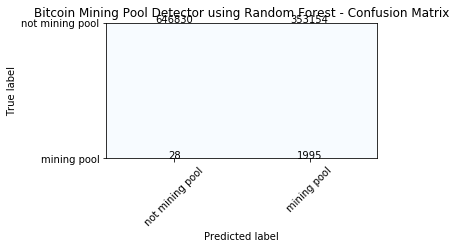

In [16]:
# Confusion matrix code adapted from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize = True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    dummy = np.array([[0, 0], [0, 0]])
    plt.figure(figsize = (6, 6))
    plt.imshow(dummy, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = "center",
                 color = "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['not mining pool', 'mining pool']
np.set_printoptions(precision = 2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = class_names, normalize = False, title = 'Bitcoin Mining Pool Detector using Random Forest - Confusion Matrix')

plt.show()

Confusion matrix, without normalization
[[646830 353154]
 [    28   1995]]


<Figure size 432x288 with 0 Axes>

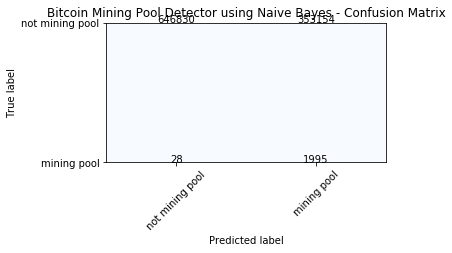

In [17]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['not mining pool', 'mining pool']
np.set_printoptions(precision = 3)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = class_names, normalize = False, title = 'Bitcoin Mining Pool Detector using Naive Bayes - Confusion Matrix')

plt.show()

In [18]:
# Calculating Accuracy
acc = (cnf_matrix[0][0] + cnf_matrix[1][1]) / (cnf_matrix[0][0] + cnf_matrix[1][1] + cnf_matrix[0][1] + cnf_matrix[1][0])
print("Test Accuracy (Naive Bayes Classification): {}%" .format(acc * 100))

Test Accuracy (Naive Bayes Classification): 64.75254164891064%
